# 512hw7 Project

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib.lines as lines
from datetime import datetime
import sklearn
import statsmodels.api as sm
from scipy import stats

## Data Acquisition
For this project, I used the following five data sources. <br>
- The RAW_us_confirmed_cases.csv file from the Kaggle repository of John Hopkins University COVID-19 data.
    - https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university?select=RAW_us_confirmed_cases.csv
<br>
- The CDC dataset of masking mandates by county.
    - https://data.cdc.gov/Policy-Surveillance/U-S-State-and-Territorial-Public-Mask-Mandates-Fro/62d6-pm5i
<br>
- The New York Times mask compliance survey data.
    - https://github.com/nytimes/covid-19-data/tree/master/mask-use
<br>
- Unemployment rate by month in Maricopa County & Cook County from the Federal Reserve Bank of St. Louis.
    - https://fred.stlouisfed.org/series/AZMARI3URN
    - https://fred.stlouisfed.org/series/ILCOOK1URN
<br>
- Unemployment rate by month in Arizona State from the Bureau of Labor Statistics.
    - https://www.bls.gov/eag/eag.az.htm


In [2]:
# mask_use_by_county data
df1 = pd.read_csv("mask-use-by-county.csv")
print(df1.columns)
df1

Index(['COUNTYFP', 'NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS'], dtype='object')


,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [3]:
# mask mandate data
df2 = pd.read_csv("U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")
df2.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'order_code', 'Face_Masks_Required_in_Public',
       'Source_of_Action', 'URL', 'Citation'],
      dtype='object')

In [4]:
# raw us confirmed cases data
df3 = pd.read_csv("RAW_us_confirmed_cases.csv")
print(df3.columns)
df3

Index(['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_',
       ...
       '10/23/21', '10/24/21', '10/25/21', '10/26/21', '10/27/21', '10/28/21',
       '10/29/21', '10/30/21', '10/31/21', '11/1/21'],
      dtype='object', length=661)


,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,10043,10047,10048,10061,10083,10219,10228,10239,10252,10258
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37245,37258,37266,37285,37325,37350,37372,37398,37414,37425
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3577,3578,3578,3583,3595,3596,3596,3599,3601,3601
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4251,4252,4253,4256,4262,4275,4276,4278,4279,4281
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10192,10197,10207,10227,10338,10364,10371,10395,10406,10408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,...,5119,5119,5152,5164,5168,5185,5204,5204,5204,5218
3338,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,...,3781,3781,3794,3805,3814,3817,3829,3829,3829,3843
3339,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,...,1677,1677,1690,1700,1715,1719,1731,1731,1731,1745


In [5]:
# read the Maricopa Unemployment dataset
df4 = pd.read_csv("MaricopaFED.csv")
df4

,DATE,Unemployment
0,2020-02-01,4.0
1,2020-03-01,4.5
2,2020-04-01,13.5
3,2020-05-01,10.1
4,2020-06-01,10.3
5,2020-07-01,10.3
6,2020-08-01,6.7
7,2020-09-01,6.6
8,2020-10-01,6.1
9,2020-11-01,6.1


In [6]:
# read the Cook Unemployment dataset
df5 = pd.read_csv("CookFED.csv")
df5

,DATE,Unemployment
0,2020-02-01,3.8
1,2020-03-01,4.1
2,2020-04-01,17.1
3,2020-05-01,16.8
4,2020-06-01,16.8
5,2020-07-01,14.4
6,2020-08-01,14.2
7,2020-09-01,13.5
8,2020-10-01,9.7
9,2020-11-01,9.7


In [7]:
# read the BLS dataset for Phoenix
df6 = pd.read_csv("ArizonaBLS.csv")
df6

,Year,Period,labor_force_participation_rate,employment-population_ratio,labor_force,employment,unemployment,unemployment_rate
0,2020,Jan,61.7,58.8,3581294,3409624,171670,4.8
1,2020,Feb,61.7,58.6,3584045,3407756,176289,4.9
2,2020,Mar,61.6,58.5,3587701,3406748,180953,5.0
3,2020,Apr,60.8,52.1,3545107,3040409,504698,14.2
4,2020,May,61.9,55.4,3619124,3236482,382642,10.6
5,2020,Jun,60.9,54.3,3561870,3180733,381137,10.7
6,2020,Jul,61.6,55.2,3610878,3233654,377224,10.4
7,2020,Aug,59.9,55.7,3518731,3272951,245780,7.0
8,2020,Sep,60.2,56.0,3541969,3299327,242642,6.9
9,2020,Oct,60.3,56.2,3556433,3315121,241312,6.8


## Data Cleaning
After cleaning and combining the dataframes, I have the two cleaned datasets called 'maricopa_cases_df_reduced' and 'cook_cases_df_reduced' <br>
The columns of those two datasets are
- Province_State
- FIPS - the FIPS code of state and county
- date
- case_count - culmulative Covid-19 case count
- order_code
- daily_new_cases - daily new Covid-19 case count
- daily_infection_rate - daily new Covid-19 case count / population of that county
- new_cases_7_day_moving_average - 7-day moving average of daily new cases


In [8]:
df2.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'order_code', 'Face_Masks_Required_in_Public',
       'Source_of_Action', 'URL', 'Citation'],
      dtype='object')

In [9]:
def transform_county_fips(x):
    if x >= 100:
        return str(x)
    elif 10 <= x < 100:
        return '0' + str(x)
    else:
        return '00' + str(x)

In [10]:
df2['FIPS_State'] = df2.FIPS_State.apply(lambda x: str(x) if x >= 10 else '0' + str(x))
df2['FIPS_County'] = df2.FIPS_County.apply(transform_county_fips)

In [11]:
df2['FIPS'] = df2['FIPS_State'] + df2['FIPS_County']

In [12]:
df2_reduced = df2.drop(columns=['State_Tribe_Territory', 'FIPS_State', 'FIPS_County', 'URL', 'Citation'])
df2_reduced['date'] =  pd.to_datetime(df2_reduced['date'])
df2_reduced

,County_Name,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,FIPS
0,Autauga County,2020-04-10,2,NaN,NaN,01001
1,Autauga County,2020-04-11,2,NaN,NaN,01001
2,Autauga County,2020-04-12,2,NaN,NaN,01001
3,Autauga County,2020-04-13,2,NaN,NaN,01001
4,Autauga County,2020-04-14,2,NaN,NaN,01001
...,...,...,...,...,...,...
1593864,St. Thomas Island,2021-08-11,1,Yes,Official,78030
1593865,St. Thomas Island,2021-08-12,1,Yes,Official,78030
1593866,St. Thomas Island,2021-08-13,1,Yes,Official,78030
1593867,St. Thomas Island,2021-08-14,1,Yes,Official,78030


In [13]:
df2_reduced.Face_Masks_Required_in_Public.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [14]:
df3['FIPS'].isnull().values.any()

True

In [15]:
# function to change the county fips code for mask mandate data
# input x is float
def transform_county_fips_2(x):
    a = int(x)
    if a >= 10000:
        return str(a)
    else:
        return '0' + str(a)

In [16]:
df3_reduced = df3.drop(columns=['Admin2', 'UID', 'iso2', 'iso3', 'code3', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
df3_reduced = df3_reduced[df3_reduced['FIPS'].notna()]
df3_reduced['FIPS'] = df3_reduced.FIPS.apply(transform_county_fips_2)
print(df3_reduced.FIPS)

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3337    56039
3338    56041
3339    90056
3340    56043
3341    56045
Name: FIPS, Length: 3332, dtype: object


In [17]:
# transform df3 cols into rows using melt
df3_unpivot = df3_reduced.melt(id_vars=['Province_State','FIPS'], 
        var_name="date", 
        value_name="case_count")

df3_unpivot['date'] =  pd.to_datetime(df3_unpivot['date'])
df3_unpivot

,Province_State,FIPS,date,case_count
0,Alabama,01001,2020-01-22,0
1,Alabama,01003,2020-01-22,0
2,Alabama,01005,2020-01-22,0
3,Alabama,01007,2020-01-22,0
4,Alabama,01009,2020-01-22,0
...,...,...,...,...
2165795,Wyoming,56039,2021-11-01,5218
2165796,Wyoming,56041,2021-11-01,3843
2165797,Wyoming,90056,2021-11-01,0
2165798,Wyoming,56043,2021-11-01,1745


In [18]:
maricopa_mask_df = df2_reduced[df2_reduced['FIPS'] == '04013']
maricopa_mask_df

,County_Name,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,FIPS
27398,Maricopa County,2020-04-10,2,NaN,NaN,04013
27399,Maricopa County,2020-04-11,2,NaN,NaN,04013
27400,Maricopa County,2020-04-12,2,NaN,NaN,04013
27401,Maricopa County,2020-04-13,2,NaN,NaN,04013
27402,Maricopa County,2020-04-14,2,NaN,NaN,04013
...,...,...,...,...,...,...
883581,Maricopa County,2021-08-11,2,NaN,NaN,04013
883582,Maricopa County,2021-08-12,2,NaN,NaN,04013
883583,Maricopa County,2021-08-13,2,NaN,NaN,04013
883584,Maricopa County,2021-08-14,2,NaN,NaN,04013


In [19]:
cook_mask_df = df2_reduced[df2_reduced['FIPS'] == '17031']
cook_mask_df

,County_Name,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,FIPS
162293,Cook County,2020-04-10,2,NaN,NaN,17031
162294,Cook County,2020-04-11,2,NaN,NaN,17031
162295,Cook County,2020-04-12,2,NaN,NaN,17031
162296,Cook County,2020-04-13,2,NaN,NaN,17031
162297,Cook County,2020-04-14,2,NaN,NaN,17031
...,...,...,...,...,...,...
998670,Cook County,2021-08-11,2,No,Official,17031
998671,Cook County,2021-08-12,2,No,Official,17031
998672,Cook County,2021-08-13,2,No,Official,17031
998673,Cook County,2021-08-14,2,No,Official,17031


In [20]:
maricopa_mask_df.Face_Masks_Required_in_Public.unique()

array([nan], dtype=object)

In [21]:
cook_mask_df.Face_Masks_Required_in_Public.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [22]:
cook_mask_df = cook_mask_df.copy()
cook_mask_df.loc[cook_mask_df.Face_Masks_Required_in_Public.isnull(), 'Face_Masks_Required_in_Public'] = 'No'
cook_mask_df_reduced = cook_mask_df.drop(columns= ['order_code', 'Source_of_Action', 'FIPS'])
cook_mask_df_reduced

,County_Name,date,Face_Masks_Required_in_Public
162293,Cook County,2020-04-10,No
162294,Cook County,2020-04-11,No
162295,Cook County,2020-04-12,No
162296,Cook County,2020-04-13,No
162297,Cook County,2020-04-14,No
...,...,...,...
998670,Cook County,2021-08-11,No
998671,Cook County,2021-08-12,No
998672,Cook County,2021-08-13,No
998673,Cook County,2021-08-14,No


In [23]:
maricopa_mask_df.order_code.unique()

array([2], dtype=int64)

In [24]:
cook_mask_df.order_code.unique()

array([2, 1], dtype=int64)

In [25]:
# the FIPS code of maricopa is 04013
maricopa_cases_df = df3_unpivot[df3_unpivot['FIPS'] == '04013']
mask = (maricopa_cases_df['date'] >= '2020-02-01') & (maricopa_cases_df['date'] <= '2021-10-15')
maricopa_cases_df_reduced = maricopa_cases_df.loc[mask]
maricopa_cases_df_reduced

,Province_State,FIPS,date,case_count
33430,Arizona,04013,2020-02-01,1
36762,Arizona,04013,2020-02-02,1
40094,Arizona,04013,2020-02-03,1
43426,Arizona,04013,2020-02-04,1
46758,Arizona,04013,2020-02-05,1
...,...,...,...,...
2092606,Arizona,04013,2021-10-11,711742
2095938,Arizona,04013,2021-10-12,712879
2099270,Arizona,04013,2021-10-13,714404
2102602,Arizona,04013,2021-10-14,715923


In [26]:
# the FIPS code of cook county, IL is 17031
cook_cases_df = df3_unpivot[df3_unpivot['FIPS'] == '17031']
mask = (cook_cases_df['date'] >= '2020-02-01') & (cook_cases_df['date'] <= '2021-10-15')
cook_cases_df_reduced = cook_cases_df.loc[mask]
cook_cases_df_reduced

,Province_State,FIPS,date,case_count
33962,Illinois,17031,2020-02-01,2
37294,Illinois,17031,2020-02-02,2
40626,Illinois,17031,2020-02-03,2
43958,Illinois,17031,2020-02-04,2
47290,Illinois,17031,2020-02-05,2
...,...,...,...,...
2093138,Illinois,17031,2021-10-11,626475
2096470,Illinois,17031,2021-10-12,628979
2099802,Illinois,17031,2021-10-13,629834
2103134,Illinois,17031,2021-10-14,630542


In [27]:
maricopa_cases_df_reduced = maricopa_cases_df_reduced.copy()
maricopa_cases_df_reduced['order_code'] = 2
# maricopa_cases_df_reduced

In [28]:
maricopa_cases_df_reduced = maricopa_cases_df_reduced.copy()
maricopa_cases_df_reduced['daily_new_cases'] = maricopa_cases_df_reduced['case_count'].diff()
# maricopa_cases_df_reduced

In [29]:
cook_cases_df_reduced = cook_cases_df_reduced.copy()
cook_cases_df_reduced['daily_new_cases'] = cook_cases_df_reduced['case_count'].diff()
cook_cases_mask_df = pd.merge(cook_cases_df_reduced, cook_mask_df_reduced, on='date')
# cook_cases_mask_df

In [30]:
cook_cases_mask_df[cook_cases_mask_df['Face_Masks_Required_in_Public'] == 'Yes']

,Province_State,FIPS,date,case_count,daily_new_cases,County_Name,Face_Masks_Required_in_Public
21,Illinois,17031,2020-05-01,38668,2155.0,Cook County,Yes
22,Illinois,17031,2020-05-02,40227,1559.0,Cook County,Yes
23,Illinois,17031,2020-05-03,42324,2097.0,Cook County,Yes
24,Illinois,17031,2020-05-04,43715,1391.0,Cook County,Yes
25,Illinois,17031,2020-05-05,45223,1508.0,Cook County,Yes
...,...,...,...,...,...,...,...
422,Illinois,17031,2021-06-06,554962,149.0,Cook County,Yes
423,Illinois,17031,2021-06-07,555060,98.0,Cook County,Yes
424,Illinois,17031,2021-06-08,555195,135.0,Cook County,Yes
425,Illinois,17031,2021-06-09,555344,149.0,Cook County,Yes


In [31]:
maricopa_cases_df_reduced = maricopa_cases_df_reduced.copy()
cook_cases_df_reduced = cook_cases_df_reduced.copy()
maricopa_population = 4420568.0
cook_population = 5275541.0
maricopa_cases_df_reduced['daily_infection_rate'] = maricopa_cases_df_reduced['daily_new_cases'].apply(lambda x: x * 1.0 / maricopa_population)
maricopa_cases_df_reduced['new_cases_7_day_moving_average'] = maricopa_cases_df_reduced['daily_new_cases'].rolling(window=7).mean().round()
cook_cases_df_reduced['daily_infection_rate'] = cook_cases_df_reduced['daily_new_cases'].apply(lambda x: x * 1.0 / cook_population)
cook_cases_df_reduced['new_cases_7_day_moving_average'] = cook_cases_df_reduced['daily_new_cases'].rolling(window=7).mean().round()

In [32]:
maricopa_cases_df_reduced

,Province_State,FIPS,date,case_count,order_code,daily_new_cases,daily_infection_rate,new_cases_7_day_moving_average
33430,Arizona,04013,2020-02-01,1,2,NaN,NaN,NaN
36762,Arizona,04013,2020-02-02,1,2,0.0,0.000000,NaN
40094,Arizona,04013,2020-02-03,1,2,0.0,0.000000,NaN
43426,Arizona,04013,2020-02-04,1,2,0.0,0.000000,NaN
46758,Arizona,04013,2020-02-05,1,2,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...
2092606,Arizona,04013,2021-10-11,711742,2,1109.0,0.000251,1422.0
2095938,Arizona,04013,2021-10-12,712879,2,1137.0,0.000257,1410.0
2099270,Arizona,04013,2021-10-13,714404,2,1525.0,0.000345,1420.0
2102602,Arizona,04013,2021-10-14,715923,2,1519.0,0.000344,1411.0


In [ ]:
cook_cases_df_reduced

## Research Question 1
- Research Question #1
    - What does the pandemic situation look like in Maricopa County vs Cook County? (Infection rate, daily cases) What about the estimated mask prevalence in those counties?
    - Hypothesis: Maricopa County has a higher infection rate and significantly more cases than Cook County. The estimated mask prevalence in Maricopa County is lower than that in Cook County.


Plot the daily new cases and the 7-day moving average for Maricopa, AZ from 2020/02/01 to 2021/10/15

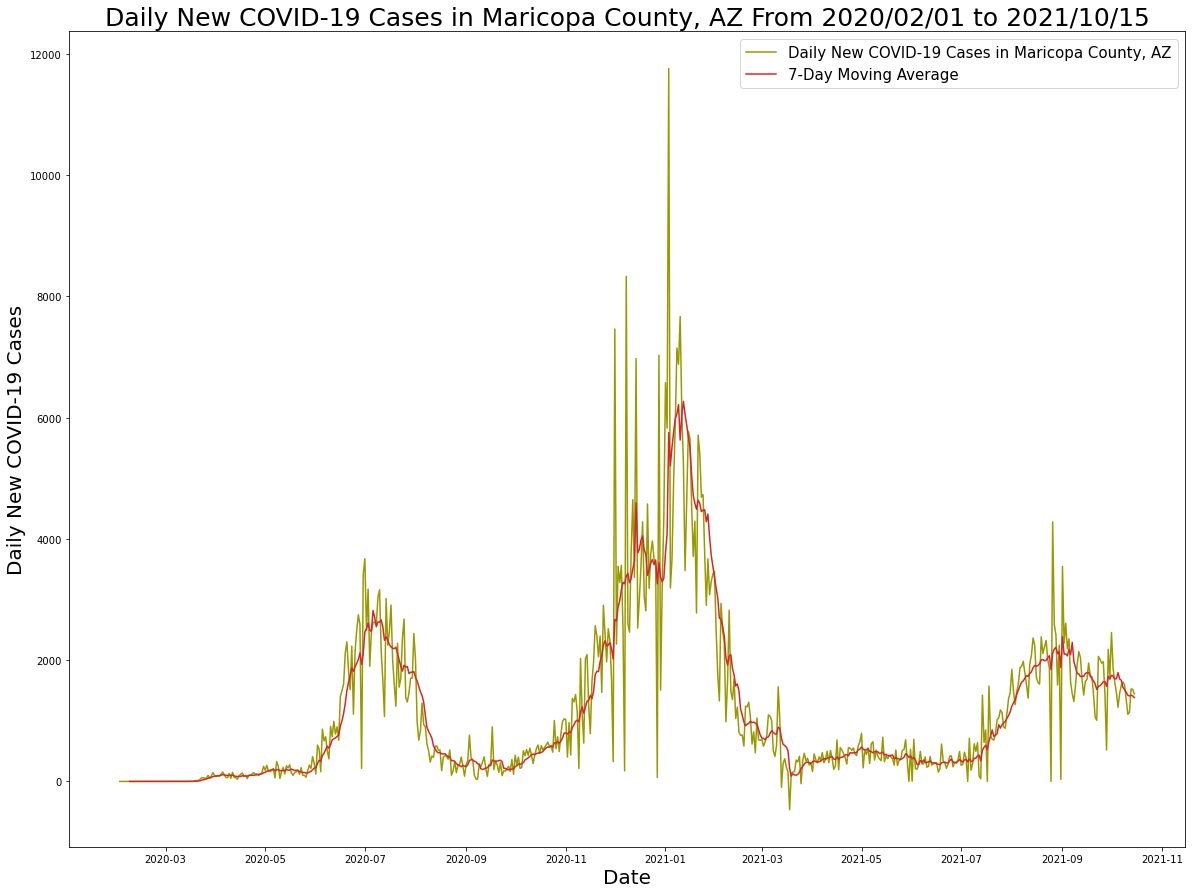

In [33]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(maricopa_cases_df_reduced['date'], maricopa_cases_df_reduced['daily_new_cases'], color='#999900')
ax.plot(maricopa_cases_df_reduced['date'], maricopa_cases_df_reduced['new_cases_7_day_moving_average'], color='C3')

line0 = lines.Line2D([0], [0], label='Daily New COVID-19 Cases in Maricopa County, AZ', color='#999900')
line1 = lines.Line2D([0], [0], label='7-Day Moving Average', color='C3')

plt.legend(handles=[line0, line1], prop={'size': 15})

ax.set_title("Daily New COVID-19 Cases in Maricopa County, AZ From 2020/02/01 to 2021/10/15", fontdict={'fontsize': 25})
ax.set_xlabel("Date", fontdict={'fontsize': 20})
ax.set_ylabel("Daily New COVID-19 Cases", fontdict={'fontsize': 20})

plt.show()

Plot the daily new cases and the 7-day moving average for Cook, IL (including mask mandate) from 2020/02/01 to 2021/10/15

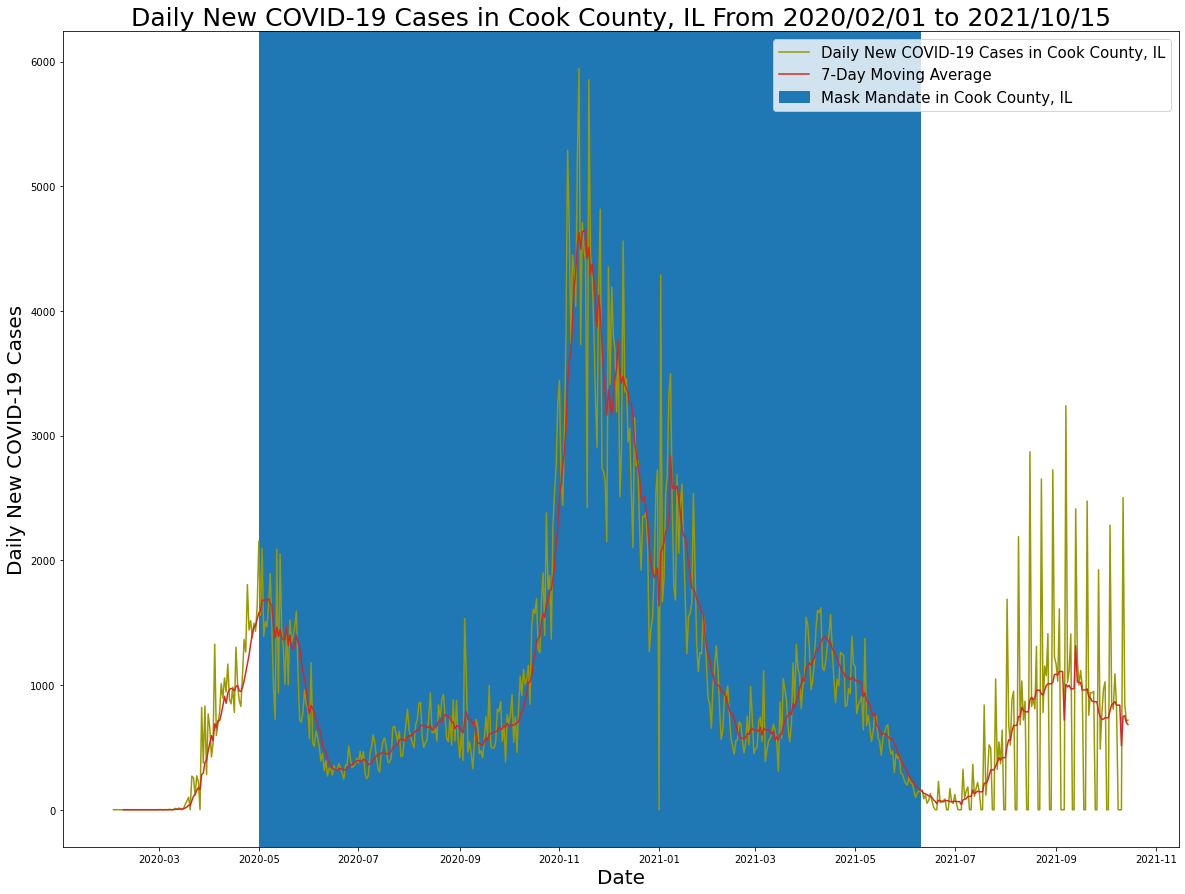

In [34]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(cook_cases_df_reduced['date'], cook_cases_df_reduced['daily_new_cases'], color='#999900')
ax.plot(cook_cases_df_reduced['date'], cook_cases_df_reduced['new_cases_7_day_moving_average'], color='C3')

line0 = lines.Line2D([0], [0], label='Daily New COVID-19 Cases in Cook County, IL', color='#999900')
line1 = lines.Line2D([0], [0], label='7-Day Moving Average', color='C3')
span = ax.axvspan(date2num(datetime(2020,5,1)), date2num(datetime(2021,6,10)),color='C0', label = 'Mask Mandate in Cook County, IL')

plt.legend(handles=[line0, line1, span], prop={'size': 15})

ax.set_title("Daily New COVID-19 Cases in Cook County, IL From 2020/02/01 to 2021/10/15", fontdict={'fontsize': 25})
ax.set_xlabel("Date", fontdict={'fontsize': 20})
ax.set_ylabel("Daily New COVID-19 Cases", fontdict={'fontsize': 20})

plt.show()

In [35]:
maricopa_cook_df=maricopa_cases_df_reduced.merge(cook_cases_df_reduced, left_on='date', right_on='date', suffixes=('_maricopa', '_cook'))
maricopa_cook_df.columns

Index(['Province_State_maricopa', 'FIPS_maricopa', 'date',
       'case_count_maricopa', 'order_code', 'daily_new_cases_maricopa',
       'daily_infection_rate_maricopa',
       'new_cases_7_day_moving_average_maricopa', 'Province_State_cook',
       'FIPS_cook', 'case_count_cook', 'daily_new_cases_cook',
       'daily_infection_rate_cook', 'new_cases_7_day_moving_average_cook'],
      dtype='object')

Plot the daily infection rate for Maricopa, AZ vs Cook, IL from 2020/02/01 to 2021/10/15.

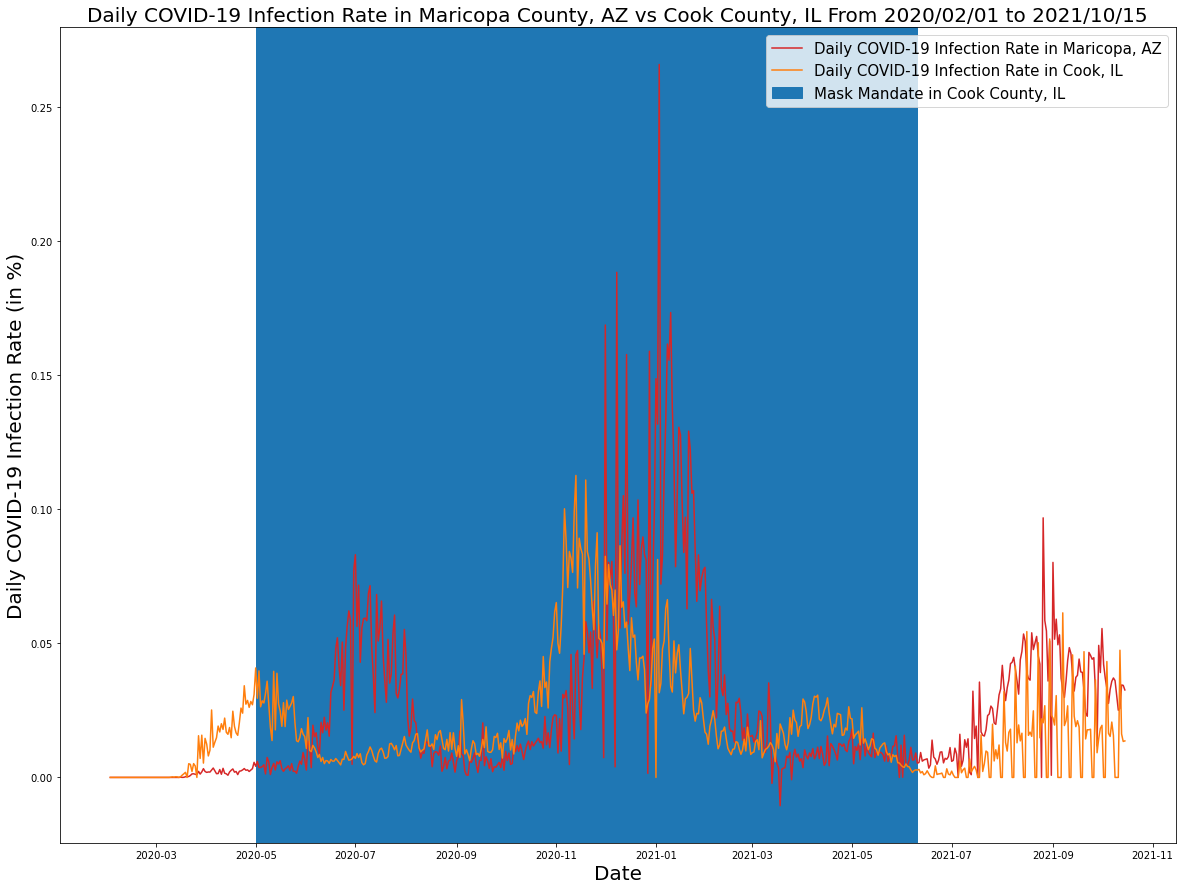

In [36]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(maricopa_cook_df['date'], maricopa_cook_df['daily_infection_rate_maricopa']*100, color='C3')
ax.plot(maricopa_cook_df['date'], maricopa_cook_df['daily_infection_rate_cook']*100, color='C1')

line0 = lines.Line2D([0], [0], label='Daily COVID-19 Infection Rate in Maricopa, AZ', color='C3')
line1 = lines.Line2D([0], [0], label='Daily COVID-19 Infection Rate in Cook, IL', color='C1')
span = ax.axvspan(date2num(datetime(2020,5,1)), date2num(datetime(2021,6,10)),color="C0", label = 'Mask Mandate in Cook County, IL')

plt.legend(handles=[
    line0,
    line1,
span], prop={'size': 15})

ax.set_title("Daily COVID-19 Infection Rate in Maricopa County, AZ vs Cook County, IL From 2020/02/01 to 2021/10/15", fontdict={'fontsize': 20})
ax.set_xlabel("Date", fontdict={'fontsize': 20})
ax.set_ylabel("Daily COVID-19 Infection Rate (in %)", fontdict={'fontsize': 20})

plt.show()

Plot the 7-day moving average for daily new cases for Maricopa, AZ vs Cook, IL from 2020/02/01 to 2021/10/15.

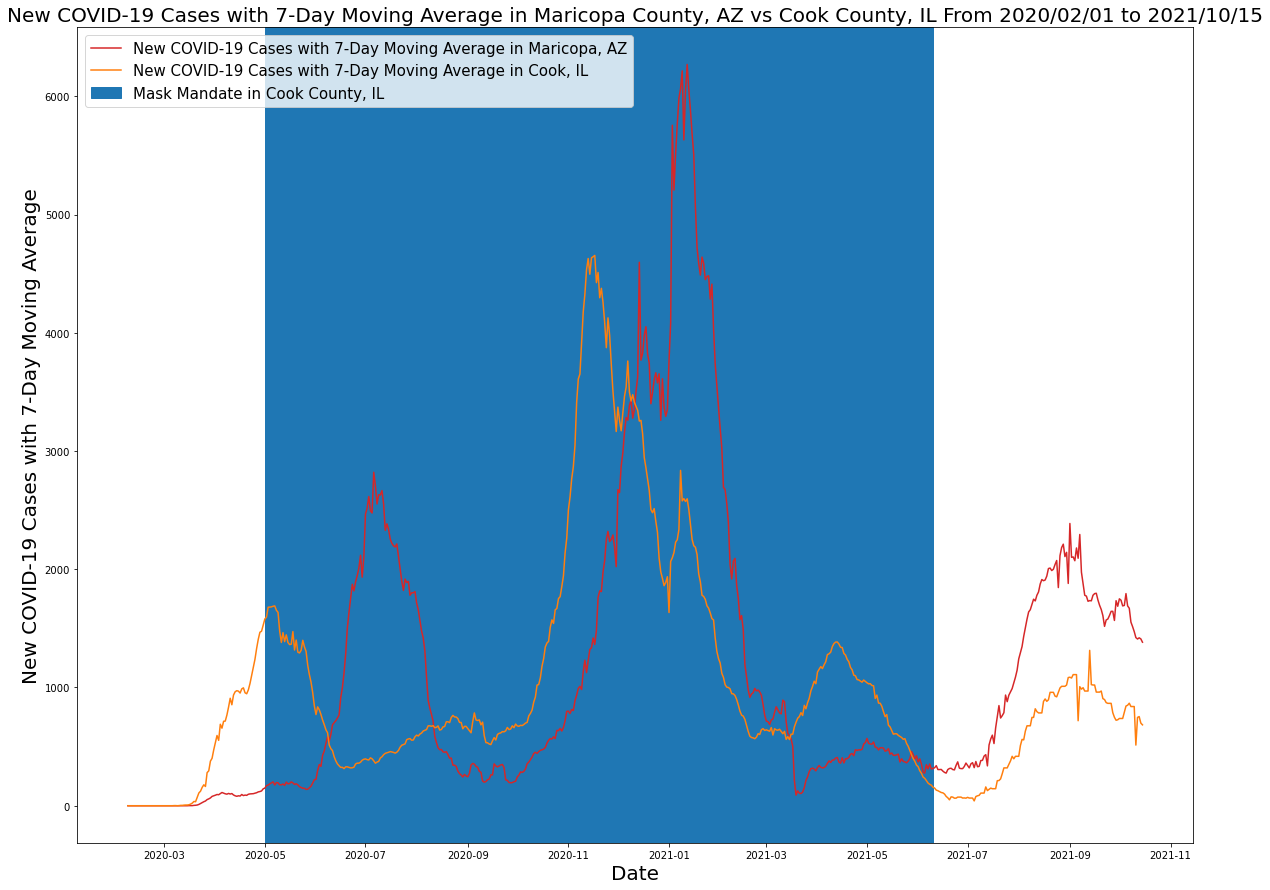

In [37]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(maricopa_cook_df['date'], maricopa_cook_df['new_cases_7_day_moving_average_maricopa'], color='C3')
ax.plot(maricopa_cook_df['date'], maricopa_cook_df['new_cases_7_day_moving_average_cook'], color='C1')

line0 = lines.Line2D([0], [0], label='New COVID-19 Cases with 7-Day Moving Average in Maricopa, AZ', color='C3')
line1 = lines.Line2D([0], [0], label='New COVID-19 Cases with 7-Day Moving Average in Cook, IL', color='C1')
span = ax.axvspan(date2num(datetime(2020,5,1)), date2num(datetime(2021,6,10)),color="C0", label = 'Mask Mandate in Cook County, IL')

plt.legend(handles=[
    line0,
    line1,
span], prop={'size': 15})

ax.set_title("New COVID-19 Cases with 7-Day Moving Average in Maricopa County, AZ vs Cook County, IL From 2020/02/01 to 2021/10/15", fontdict={'fontsize': 20})
ax.set_xlabel("Date", fontdict={'fontsize': 20})
ax.set_ylabel("New COVID-19 Cases with 7-Day Moving Average", fontdict={'fontsize': 20})

plt.show()

## Research Question 2
- Research Question #2
    - How was the unemployment rate in Maricopa County affected by the pandemic? What about Cook County?
    - Hypothesis: Every 10% increase in infection rate would result in a 1% increase in unemployment in Maricopa County, Arizona. The number would be lower for Cook County, Illinois.


Construct the OLS linear regression model using the monthly unemployment rate vs the Covid-19 infection rate for Maricopa, AZ

In [38]:
maricopa_monthly_df_reduced = maricopa_cases_df_reduced.drop(columns=['order_code'])
monthly_maricopa_df = maricopa_monthly_df_reduced.set_index('date')
monthly_maricopa_df.index = pd.to_datetime(monthly_maricopa_df.index)
monthly_maricopa_cases_df = monthly_maricopa_df.resample('M').agg({'daily_new_cases': np.sum})
monthly_maricopa_df = monthly_maricopa_cases_df.reset_index()
monthly_maricopa_df.date = monthly_maricopa_df.date.apply(lambda x: x.replace(day=1))

In [39]:
monthly_maricopa_df['unemployment'] = df4['Unemployment']
monthly_maricopa_df = monthly_maricopa_df.rename(columns = {'daily_new_cases': 'monthly_new_cases'})
monthly_maricopa_df = monthly_maricopa_df[:-1]
monthly_maricopa_df = monthly_maricopa_df.copy()
monthly_maricopa_df['monthly_infection_rate'] = monthly_maricopa_df['monthly_new_cases'] / maricopa_population * 100
monthly_maricopa_df['monthly_infection_rate_pct_change'] = monthly_maricopa_df.monthly_infection_rate.pct_change()
monthly_maricopa_df.monthly_infection_rate_pct_change *= 100
monthly_maricopa_df

,date,monthly_new_cases,unemployment,monthly_infection_rate,monthly_infection_rate_pct_change
0,2020-02-01,0.0,4.0,0.000000,NaN
1,2020-03-01,787.0,4.5,0.017803,inf
2,2020-04-01,3184.0,13.5,0.072027,304.574333
3,2020-05-01,5843.0,10.1,0.132178,83.511307
4,2020-06-01,38777.0,10.3,0.877195,563.648811
5,2020-07-01,68701.0,10.3,1.554122,77.169456
6,2020-08-01,16435.0,6.7,0.371785,-76.077495
7,2020-09-01,8128.0,6.6,0.183868,-50.544570
8,2020-10-01,16905.0,6.1,0.382417,107.984744
9,2020-11-01,46897.0,6.1,1.060882,177.414966


In [40]:
X1 = monthly_maricopa_df.monthly_infection_rate
y1 = monthly_maricopa_df.unemployment
X11 = X1.tolist()[1:]
maricopa_infection_rate = np.asarray(X11).reshape(-1,1)
maricopa_unemployment_rate = y1.tolist()[1:]

In [41]:
from sklearn.linear_model import LinearRegression
maricopa_naive_lm = LinearRegression().fit(maricopa_infection_rate, maricopa_unemployment_rate)
maricopa_naive_lm.score(maricopa_infection_rate, maricopa_unemployment_rate)

0.012203628380221154

In [42]:
print(maricopa_naive_lm.coef_)
print(maricopa_naive_lm.intercept_)

[-0.2896649]
7.239468080802603


Model diagnostics for the first model

In [43]:
# model diagnostics
X = maricopa_infection_rate
y = maricopa_unemployment_rate

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
model1 = est.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.2100
Date:                Sat, 11 Dec 2021   Prob (F-statistic):              0.653
Time:                        17:51:33   Log-Likelihood:                -42.827
No. Observations:                  19   AIC:                             89.65
Df Residuals:                      17   BIC:                             91.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2395      0.765      9.460      0.0

C:\Users\Qingyu Chen\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot for the first model

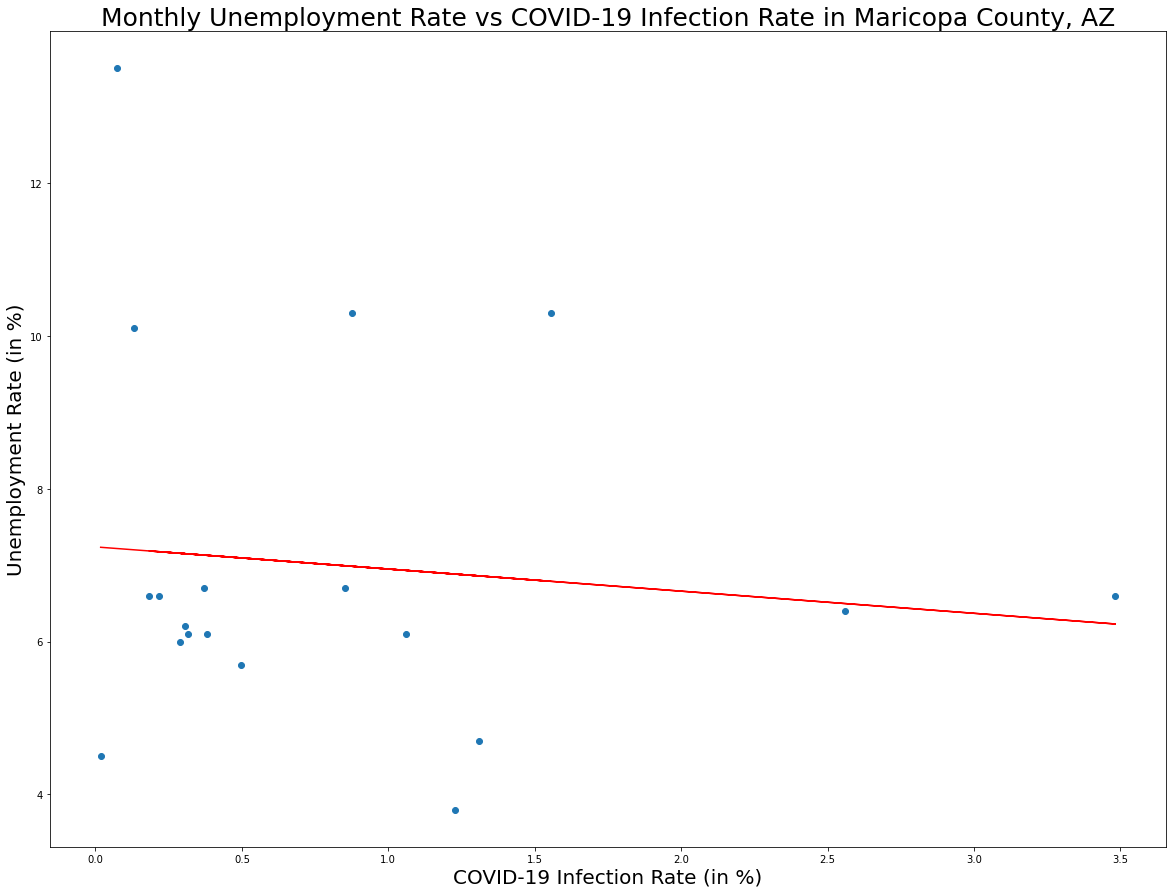

In [44]:
fig, ax = plt.subplots(figsize=(20,15))

plt.scatter(maricopa_infection_rate, maricopa_unemployment_rate)
Y_pred = maricopa_naive_lm.predict(maricopa_infection_rate)
plt.plot(maricopa_infection_rate, Y_pred, color='red')

ax.set_title("Monthly Unemployment Rate vs COVID-19 Infection Rate in Maricopa County, AZ", fontdict={'fontsize': 25})
ax.set_xlabel("COVID-19 Infection Rate (in %)", fontdict={'fontsize': 20})
ax.set_ylabel("Unemployment Rate (in %)", fontdict={'fontsize': 20})

plt.show()

Construct the OLS linear regression model using the monthly unemployment rate vs the pecentage change in Covid-19 infection rate for Maricopa, AZ

In [45]:
X1 = monthly_maricopa_df.monthly_infection_rate_pct_change
y1 = monthly_maricopa_df.unemployment
X11 = X1.tolist()[2:]
maricopa_infection_rate_pct_change = np.asarray(X11).reshape(-1,1)
maricopa_unemployment_rate = y1.tolist()[2:]

In [46]:
from sklearn.linear_model import LinearRegression
maricopa_lm = LinearRegression().fit(maricopa_infection_rate_pct_change, maricopa_unemployment_rate)
maricopa_lm.score(maricopa_infection_rate_pct_change, maricopa_unemployment_rate)

0.28318645222673366

In [47]:
print(maricopa_lm.coef_)
print(maricopa_lm.intercept_)

[0.00795013]
6.484714415951155


Model diagnostics for the second model

In [48]:
# model diagnostics
X = maricopa_infection_rate_pct_change
y = maricopa_unemployment_rate

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
model2 = est.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     6.321
Date:                Sat, 11 Dec 2021   Prob (F-statistic):             0.0230
Time:                        17:51:33   Log-Likelihood:                -37.573
No. Observations:                  18   AIC:                             79.15
Df Residuals:                      16   BIC:                             80.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4847      0.553     11.729      0.0

C:\Users\Qingyu Chen\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot for the second model

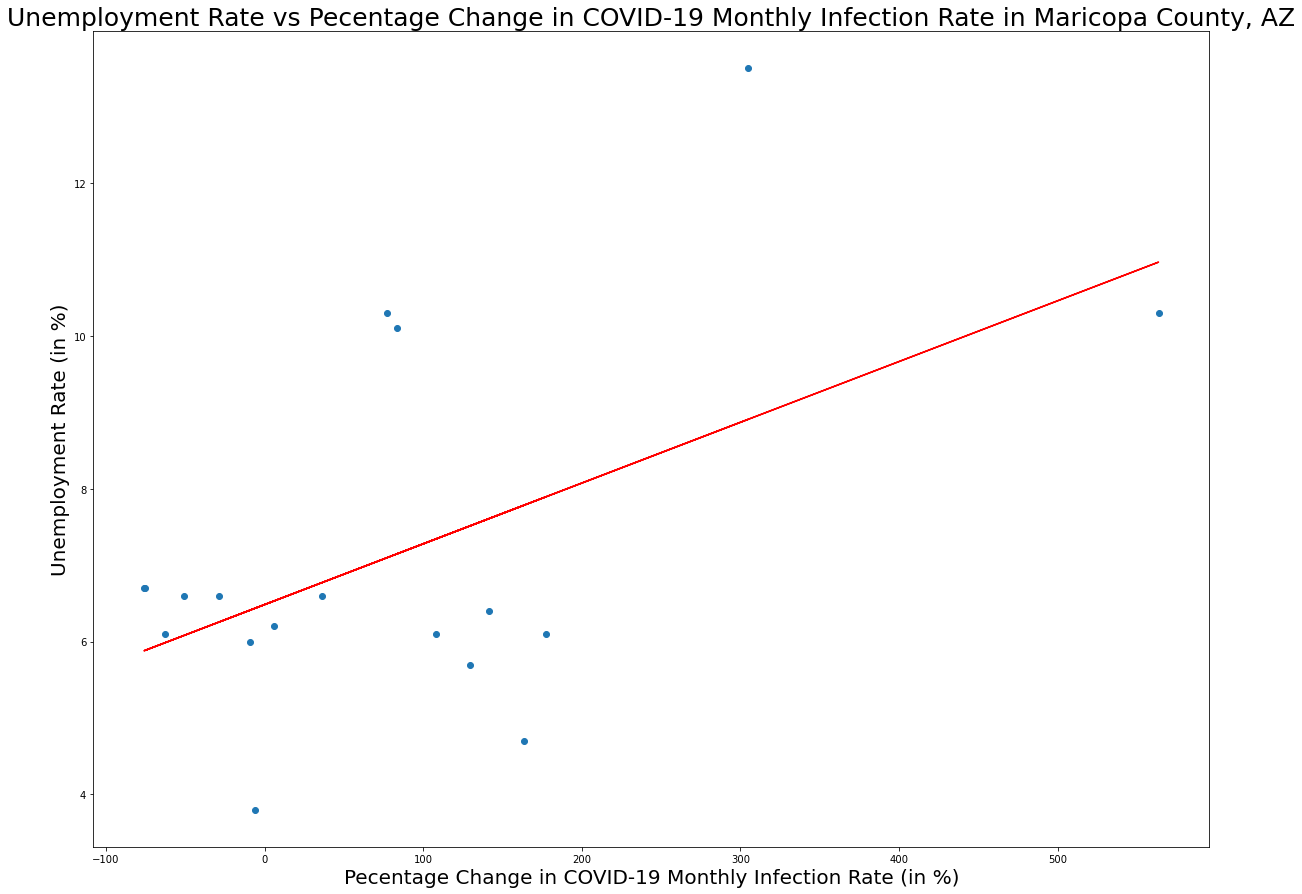

In [49]:
fig, ax = plt.subplots(figsize=(20,15))

plt.scatter(maricopa_infection_rate_pct_change, maricopa_unemployment_rate)
Y_pred = maricopa_lm.predict(maricopa_infection_rate_pct_change)
plt.plot(maricopa_infection_rate_pct_change, Y_pred, color='red')

ax.set_title("Unemployment Rate vs Pecentage Change in COVID-19 Monthly Infection Rate in Maricopa County, AZ", fontdict={'fontsize': 25})
ax.set_xlabel("Pecentage Change in COVID-19 Monthly Infection Rate (in %)", fontdict={'fontsize': 20})
ax.set_ylabel("Unemployment Rate (in %)", fontdict={'fontsize': 20})

plt.show()

Construct the OLS linear regression model using the monthly unemployment rate vs the pecentage change in Covid-19 infection rate for Cook, IL.

In [50]:
cook_monthly_df_reduced = cook_cases_df_reduced.drop(columns=['case_count'])
monthly_cook_df = cook_monthly_df_reduced.set_index('date')
monthly_cook_df.index = pd.to_datetime(monthly_cook_df.index)
monthly_cook_cases_df = monthly_cook_df.resample('M').agg({'daily_new_cases': np.sum})
monthly_cook_df = monthly_cook_cases_df.reset_index()
monthly_cook_df.date = monthly_cook_df.date.apply(lambda x: x.replace(day=1))
monthly_cook_df

,date,daily_new_cases
0,2020-02-01,0.0
1,2020-03-01,4494.0
2,2020-04-01,32017.0
3,2020-05-01,41412.0
4,2020-06-01,12611.0
5,2020-07-01,14957.0
6,2020-08-01,21084.0
7,2020-09-01,18885.0
8,2020-10-01,44198.0
9,2020-11-01,116709.0


In [51]:
monthly_cook_df['unemployment'] = df5['Unemployment']
monthly_cook_df = monthly_cook_df.rename(columns = {'daily_new_cases': 'monthly_new_cases'})
monthly_cook_df = monthly_cook_df[:-1]
monthly_cook_df = monthly_cook_df.copy()
monthly_cook_df['monthly_infection_rate'] = monthly_cook_df['monthly_new_cases'] / cook_population
monthly_cook_df['monthly_infection_rate_pct_change'] = monthly_cook_df.monthly_infection_rate.pct_change()
monthly_cook_df.monthly_infection_rate_pct_change *= 100
monthly_cook_df

,date,monthly_new_cases,unemployment,monthly_infection_rate,monthly_infection_rate_pct_change
0,2020-02-01,0.0,3.8,0.000000,NaN
1,2020-03-01,4494.0,4.1,0.000852,inf
2,2020-04-01,32017.0,17.1,0.006069,612.438807
3,2020-05-01,41412.0,16.8,0.007850,29.343786
4,2020-06-01,12611.0,16.8,0.002390,-69.547474
5,2020-07-01,14957.0,14.4,0.002835,18.602807
6,2020-08-01,21084.0,14.2,0.003997,40.964097
7,2020-09-01,18885.0,13.5,0.003580,-10.429710
8,2020-10-01,44198.0,9.7,0.008378,134.037596
9,2020-11-01,116709.0,9.7,0.022123,164.059460


In [52]:
X1 = monthly_cook_df.monthly_infection_rate_pct_change
y1 = monthly_cook_df.unemployment
X11 = X1.tolist()[2:]
cook_infection_rate_pct_change = np.asarray(X11).reshape(-1,1)
cook_unemployment_rate = y1.tolist()[2:]

In [53]:
from sklearn.linear_model import LinearRegression
cook_lm = LinearRegression().fit(cook_infection_rate_pct_change, cook_unemployment_rate)
cook_lm.score(cook_infection_rate_pct_change, cook_unemployment_rate)

0.05680131532995225

In [54]:
print(cook_lm.coef_)
print(cook_lm.intercept_)

[0.00483812]
10.803414727631303


Model diagnostics for the third model

In [55]:
# model diagnostics
X = cook_infection_rate_pct_change
y = cook_unemployment_rate

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
model3 = est.fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9636
Date:                Sat, 11 Dec 2021   Prob (F-statistic):              0.341
Time:                        17:51:34   Log-Likelihood:                -46.461
No. Observations:                  18   AIC:                             96.92
Df Residuals:                      16   BIC:                             98.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8034      0.859     12.584      0.0

C:\Users\Qingyu Chen\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot for the third model

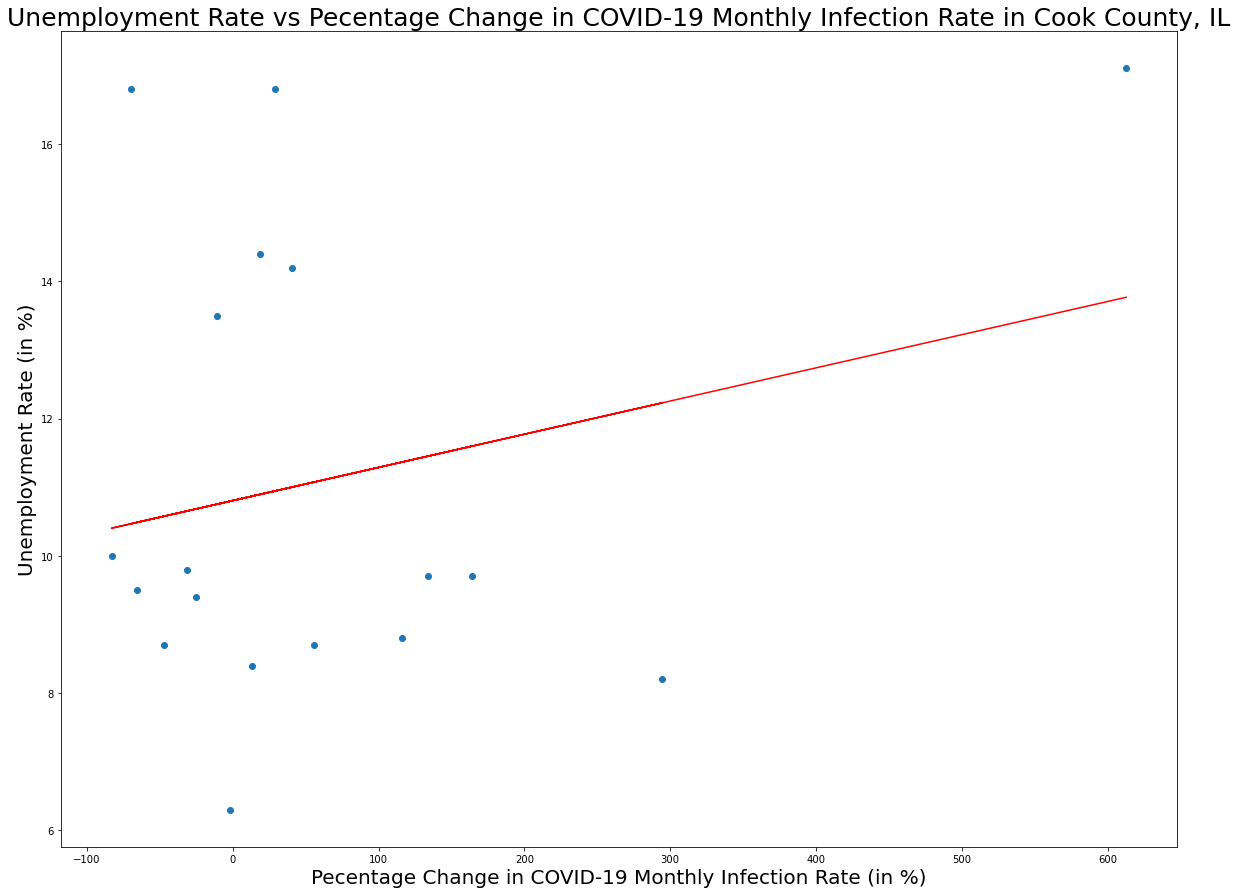

In [56]:
fig, ax = plt.subplots(figsize=(20,15))

plt.scatter(cook_infection_rate_pct_change, cook_unemployment_rate)
Y_pred = cook_lm.predict(cook_infection_rate_pct_change)
plt.plot(cook_infection_rate_pct_change, Y_pred, color='red')

ax.set_title("Unemployment Rate vs Pecentage Change in COVID-19 Monthly Infection Rate in Cook County, IL", fontdict={'fontsize': 25})
ax.set_xlabel("Pecentage Change in COVID-19 Monthly Infection Rate (in %)", fontdict={'fontsize': 20})
ax.set_ylabel("Unemployment Rate (in %)", fontdict={'fontsize': 20})

plt.show()

Plot for the estimated mask prevalence of Maricopa, AZ vs Cook, IL

In [57]:
maricopa_county_mask_proportion = df1[df1.COUNTYFP == 4013]
maricopa_county_mask_proportion

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
103,4013,0.023,0.025,0.059,0.158,0.734


In [58]:
maricopa_county_mask_proportion_df = maricopa_county_mask_proportion.drop(columns=['COUNTYFP'])
maricopa_county_mask_proportion_df = pd.melt(maricopa_county_mask_proportion_df, var_name ='Response', value_name = "Proportion")
maricopa_county_mask_proportion_df

,Response,Proportion
0,NEVER,0.023
1,RARELY,0.025
2,SOMETIMES,0.059
3,FREQUENTLY,0.158
4,ALWAYS,0.734


In [59]:
cook_county_mask_proportion = df1[df1.COUNTYFP == 17031]
cook_county_mask_proportion

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
610,17031,0.023,0.021,0.072,0.162,0.722


In [60]:
cook_county_mask_proportion_df = cook_county_mask_proportion.drop(columns=['COUNTYFP'])
cook_county_mask_proportion_df = pd.melt(cook_county_mask_proportion_df, var_name ='Response', value_name = "Proportion")
cook_county_mask_proportion_df

,Response,Proportion
0,NEVER,0.023
1,RARELY,0.021
2,SOMETIMES,0.072
3,FREQUENTLY,0.162
4,ALWAYS,0.722


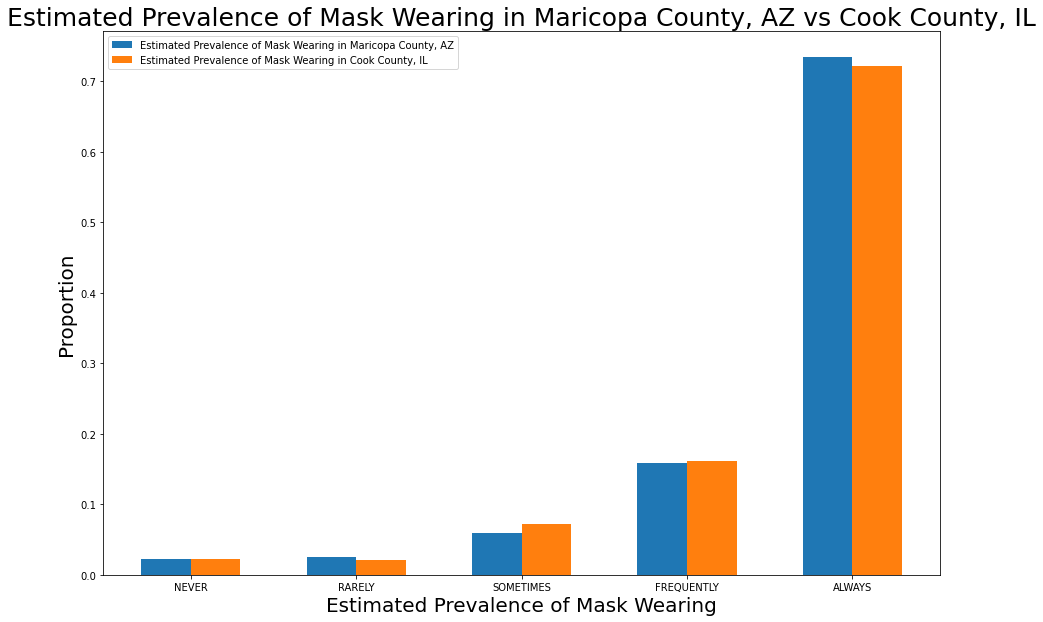

In [61]:
# Numbers of pairs of bars you want
N = 5
# Data on X-axis
# Specify the values of blue bars (height)
maricopa_mask = maricopa_county_mask_proportion_df.Proportion
# Specify the values of orange bars (height)
cook_mask = cook_county_mask_proportion_df.Proportion

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,10))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, maricopa_mask, width, label='Estimated Prevalence of Mask Wearing in Maricopa County, AZ')
plt.bar(ind + width, cook_mask, width, label='Estimated Prevalence of Mask Wearing in Cook County, IL')

plt.xlabel('Estimated Prevalence of Mask Wearing', fontdict={'fontsize': 20})
plt.ylabel('Proportion', fontdict={'fontsize': 20})
plt.title('Estimated Prevalence of Mask Wearing in Maricopa County, AZ vs Cook County, IL', fontdict={'fontsize': 25})

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, cook_county_mask_proportion_df.Response)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Research Question 3
- Research Question #3
    - One of the major metropolitan areas - Phoenix, is in Maricopa County, Arizona. What does the infection rate look like in Maricopa County compared to the rest of Arizona? What about the unemployment rate? Which area’s unemployment rate is more sensitive to the pandemic?
    - Hypothesis: The infection rate is lower in Maricopa County compared to the rest of Arizona State. The unemployment rate is lower in Maricopa County compared to that of Arizona State. The unemployment rate in Maricopa County is less sensitive to the pandemic.

Comparison of the pandemic situation in Maricopa, AZ vs the rest of Arizona

In [63]:
# infection Maricopa rate compare with the rest of Arizona
arizona_cases_df = df3_unpivot[df3_unpivot['Province_State'] == 'Arizona']
arizona_cases_df = arizona_cases_df.groupby('date').agg({'case_count':np.sum}).reset_index()
arizona_cases_df['daily_new_cases'] = arizona_cases_df['case_count'].diff()
mask = (arizona_cases_df['date'] >= '2020-02-01') & (arizona_cases_df['date'] <= '2021-10-15')
arizona_cases_df_reduced = arizona_cases_df.loc[mask]
arizona_cases_df_reduced

,date,case_count,daily_new_cases
10,2020-02-01,1,0.0
11,2020-02-02,1,0.0
12,2020-02-03,1,0.0
13,2020-02-04,1,0.0
14,2020-02-05,1,0.0
...,...,...,...
628,2021-10-11,1120361,1760.0
629,2021-10-12,1122390,2029.0
630,2021-10-13,1124709,2319.0
631,2021-10-14,1127095,2386.0


In [64]:
arizona_population = 7151502.0

In [65]:
maricopa_cases_df_reduced.fillna(0)
maricopa_cases_df_reduced.reset_index()
arizona_daily = arizona_cases_df_reduced.daily_new_cases.reset_index()
maricopa_daily = maricopa_cases_df_reduced.daily_new_cases.reset_index()
arizona_exclude_maricopa_daily = arizona_daily.subtract(maricopa_daily)
arizona_exclude_maricopa_daily['daily_new_cases']

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
618    651.0
619    892.0
620    794.0
621    867.0
622    956.0
Name: daily_new_cases, Length: 623, dtype: float64

In [66]:
arizona_exclude_maricopa_cases_df = maricopa_cases_df_reduced[['date']].copy()
arizona_exclude_maricopa_cases_df = arizona_exclude_maricopa_cases_df.reset_index()
arizona_exclude_maricopa_cases_df['daily_new_cases'] = arizona_exclude_maricopa_daily['daily_new_cases']

In [67]:
arizona_exclude_maricopa_cases_df['daily_infection_rate'] = arizona_exclude_maricopa_cases_df['daily_new_cases'] / (arizona_population - maricopa_population)
arizona_exclude_maricopa_cases_df

,index,date,daily_new_cases,daily_infection_rate
0,33430,2020-02-01,NaN,NaN
1,36762,2020-02-02,0.0,0.000000
2,40094,2020-02-03,0.0,0.000000
3,43426,2020-02-04,0.0,0.000000
4,46758,2020-02-05,0.0,0.000000
...,...,...,...,...
618,2092606,2021-10-11,651.0,0.000238
619,2095938,2021-10-12,892.0,0.000327
620,2099270,2021-10-13,794.0,0.000291
621,2102602,2021-10-14,867.0,0.000317


Plot the daily Covid-19 infection rate for Maricopa, AZ vs the rest of Arizona

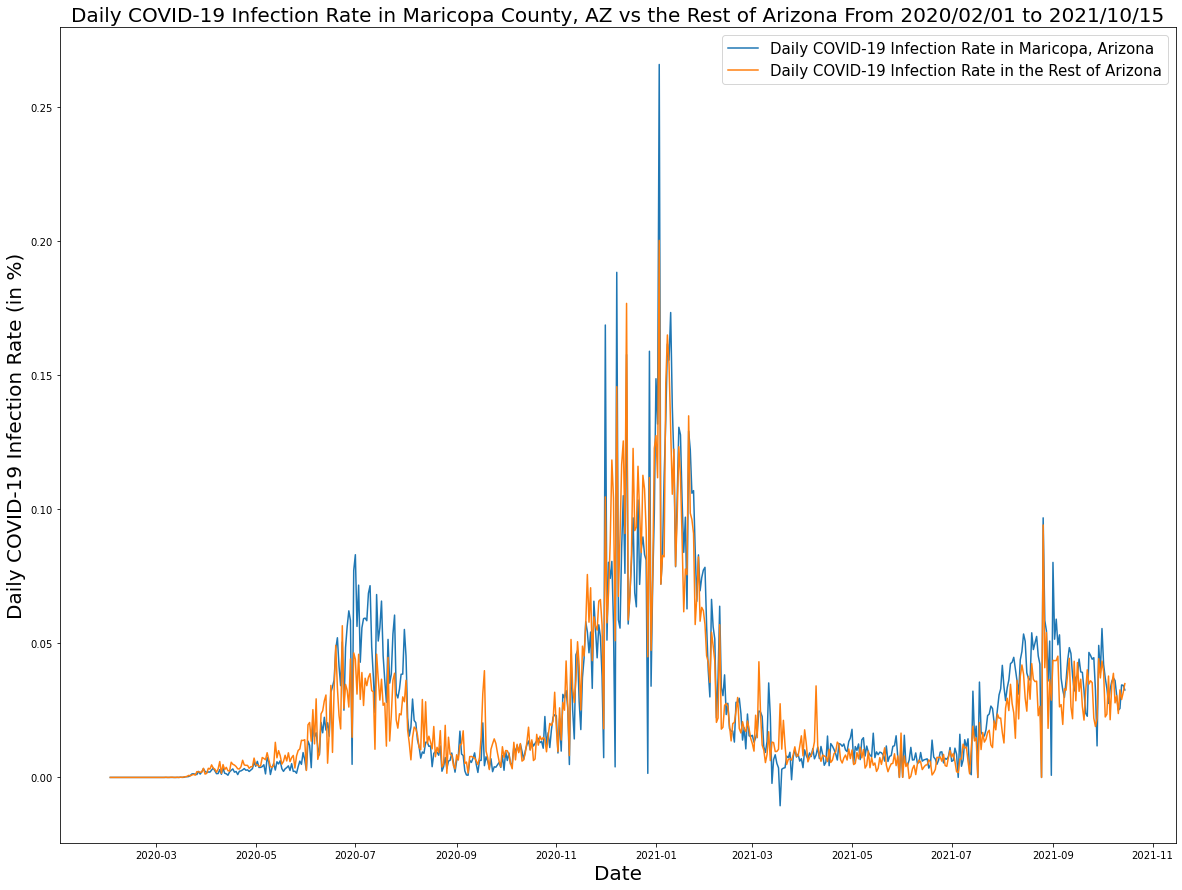

In [68]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(maricopa_cases_df_reduced['date'], maricopa_cases_df_reduced['daily_infection_rate']*100, color='C0')
ax.plot(arizona_exclude_maricopa_cases_df['date'], arizona_exclude_maricopa_cases_df['daily_infection_rate']*100, color='C1')

line0 = lines.Line2D([0], [0], label='Daily COVID-19 Infection Rate in Maricopa, Arizona', color='C0')
line1 = lines.Line2D([0], [0], label='Daily COVID-19 Infection Rate in the Rest of Arizona', color='C1')

plt.legend(handles=[
    line0,
    line1], prop={'size': 15})

ax.set_title("Daily COVID-19 Infection Rate in Maricopa County, AZ vs the Rest of Arizona From 2020/02/01 to 2021/10/15", fontdict={'fontsize': 20})
ax.set_xlabel("Date", fontdict={'fontsize': 20})
ax.set_ylabel("Daily COVID-19 Infection Rate (in %)", fontdict={'fontsize': 20})

plt.show()

Construct the OLS linear regression model using the monthly unemployment rate vs the pecentage change in Covid-19 infection rate for Arizona State.

In [70]:
# linear regression model of Arizona Unemployment vs pct change in Arizona Cases
monthly_arizona_df = arizona_cases_df_reduced.set_index('date')
monthly_arizona_df.index = pd.to_datetime(monthly_arizona_df.index)
monthly_arizona_cases_df = monthly_arizona_df.resample('M').agg({'daily_new_cases': np.sum})
monthly_arizona_df = monthly_arizona_cases_df.reset_index()
monthly_arizona_df.date = monthly_arizona_df.date.apply(lambda x: x.replace(day=1))
monthly_arizona_df = monthly_arizona_df[:-1]
monthly_arizona_df

,date,daily_new_cases
0,2020-02-01,0.0
1,2020-03-01,1288.0
2,2020-04-01,6366.0
3,2020-05-01,12281.0
4,2020-06-01,59292.0
5,2020-07-01,94782.0
6,2020-08-01,27825.0
7,2020-09-01,16672.0
8,2020-10-01,27439.0
9,2020-11-01,80871.0


In [71]:
df6_new = df6[1:].copy()
df6_new = df6_new.reset_index()
df6_new

,index,Year,Period,labor_force_participation_rate,employment-population_ratio,labor_force,employment,unemployment,unemployment_rate
0,1,2020,Feb,61.7,58.6,3584045,3407756,176289,4.9
1,2,2020,Mar,61.6,58.5,3587701,3406748,180953,5.0
2,3,2020,Apr,60.8,52.1,3545107,3040409,504698,14.2
3,4,2020,May,61.9,55.4,3619124,3236482,382642,10.6
4,5,2020,Jun,60.9,54.3,3561870,3180733,381137,10.7
5,6,2020,Jul,61.6,55.2,3610878,3233654,377224,10.4
6,7,2020,Aug,59.9,55.7,3518731,3272951,245780,7.0
7,8,2020,Sep,60.2,56.0,3541969,3299327,242642,6.9
8,9,2020,Oct,60.3,56.2,3556433,3315121,241312,6.8
9,10,2020,Nov,60.3,56.2,3563927,3322173,241754,6.8


In [72]:
monthly_arizona_df['unemployment'] = df6_new['unemployment_rate']
monthly_arizona_df = monthly_arizona_df.rename(columns = {'daily_new_cases': 'monthly_new_cases'})
monthly_arizona_df = monthly_arizona_df.copy()
monthly_arizona_df['monthly_infection_rate'] = monthly_arizona_df['monthly_new_cases'] / arizona_population
monthly_arizona_df['monthly_infection_rate_pct_change'] = monthly_arizona_df.monthly_infection_rate.pct_change()
monthly_arizona_df.monthly_infection_rate_pct_change *= 100
monthly_arizona_df

,date,monthly_new_cases,unemployment,monthly_infection_rate,monthly_infection_rate_pct_change
0,2020-02-01,0.0,4.9,0.000000,NaN
1,2020-03-01,1288.0,5.0,0.000180,inf
2,2020-04-01,6366.0,14.2,0.000890,394.254658
3,2020-05-01,12281.0,10.6,0.001717,92.915489
4,2020-06-01,59292.0,10.7,0.008291,382.794561
5,2020-07-01,94782.0,10.4,0.013253,59.856304
6,2020-08-01,27825.0,7.0,0.003891,-70.643160
7,2020-09-01,16672.0,6.9,0.002331,-40.082659
8,2020-10-01,27439.0,6.8,0.003837,64.581334
9,2020-11-01,80871.0,6.8,0.011308,194.730129


In [73]:
X1 = monthly_arizona_df.monthly_infection_rate_pct_change
y1 = monthly_arizona_df.unemployment
X11 = X1.tolist()[2:]
arizona_infection_rate_pct_change = np.asarray(X11).reshape(-1,1)
arizona_unemployment_rate = y1.tolist()[2:]

In [74]:
from sklearn.linear_model import LinearRegression
arizona_lm = LinearRegression().fit(arizona_infection_rate_pct_change, arizona_unemployment_rate)
arizona_lm.score(arizona_infection_rate_pct_change, arizona_unemployment_rate)

0.45437513454235967

In [75]:
print(arizona_lm.coef_)
print(arizona_lm.intercept_)

[0.01059784]
6.937100479871011


Model diagnostics for the fourth model

In [76]:
# model diagnostics
X = arizona_infection_rate_pct_change
y = arizona_unemployment_rate

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
model4 = est.fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     13.32
Date:                Sat, 11 Dec 2021   Prob (F-statistic):            0.00216
Time:                        17:51:35   Log-Likelihood:                -33.888
No. Observations:                  18   AIC:                             71.78
Df Residuals:                      16   BIC:                             73.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9371      0.453     15.300      0.0

C:\Users\Qingyu Chen\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot for the fourth model

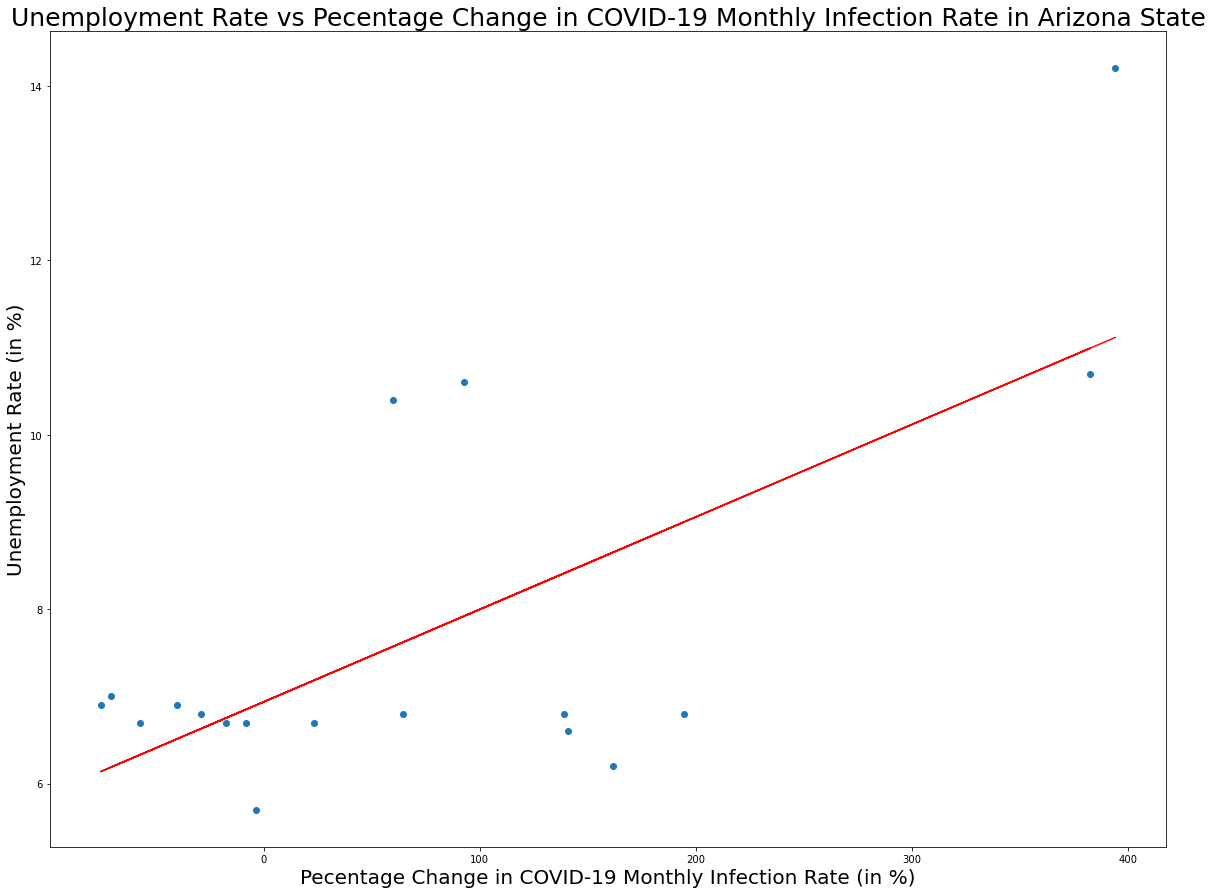

In [77]:
fig, ax = plt.subplots(figsize=(20,15))

plt.scatter(arizona_infection_rate_pct_change, arizona_unemployment_rate)
Y_pred = arizona_lm.predict(arizona_infection_rate_pct_change)
plt.plot(arizona_infection_rate_pct_change, Y_pred, color='red')

ax.set_title("Unemployment Rate vs Pecentage Change in COVID-19 Monthly Infection Rate in Arizona State", fontdict={'fontsize': 25})
ax.set_xlabel("Pecentage Change in COVID-19 Monthly Infection Rate (in %)", fontdict={'fontsize': 20})
ax.set_ylabel("Unemployment Rate (in %)", fontdict={'fontsize': 20})

plt.show()

Plot the unemployment rate in Maricopa vs Arizona

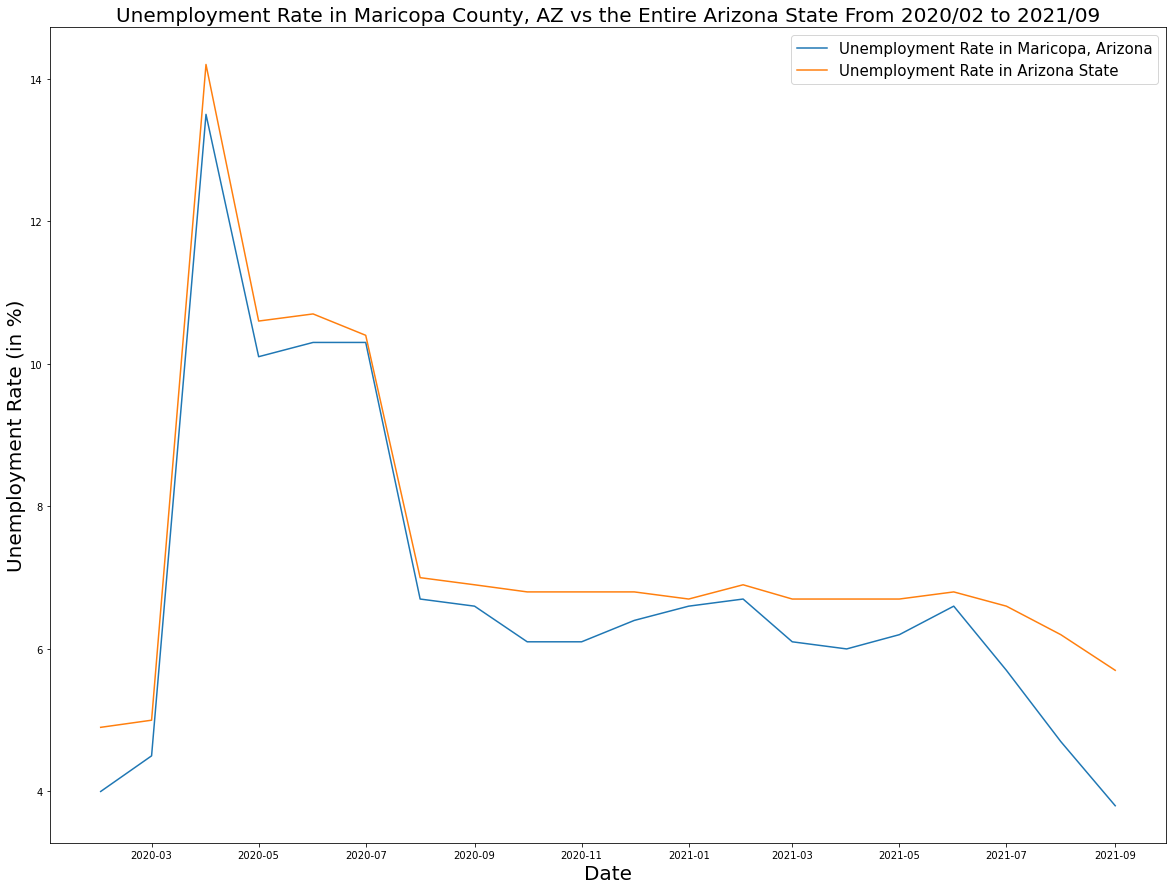

In [78]:
# line graph for Maricopa unemployment vs Arizona
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(monthly_maricopa_df['date'], monthly_maricopa_df['unemployment'], color='C0')
ax.plot(monthly_arizona_df['date'], monthly_arizona_df['unemployment'], color='C1')

line0 = lines.Line2D([0], [0], label='Unemployment Rate in Maricopa, Arizona', color='C0')
line1 = lines.Line2D([0], [0], label='Unemployment Rate in Arizona State', color='C1')

plt.legend(handles=[
    line0,
    line1], prop={'size': 15})

ax.set_title("Unemployment Rate in Maricopa County, AZ vs the Entire Arizona State From 2020/02 to 2021/09", fontdict={'fontsize': 20})
ax.set_xlabel("Date", fontdict={'fontsize': 20})
ax.set_ylabel("Unemployment Rate (in %)", fontdict={'fontsize': 20})

plt.show()

Calculate the peak daily new cases for Maricopa, AZ and Cook, IL

In [80]:
max(maricopa_cases_df_reduced.daily_new_cases.fillna(0))

11761.0

In [81]:
maricopa_cases_df_reduced[maricopa_cases_df_reduced.daily_new_cases == 11761]

,Province_State,FIPS,date,case_count,order_code,daily_new_cases,daily_infection_rate,new_cases_7_day_moving_average
1156314,Arizona,04013,2021-01-03,342994,2,11761.0,0.002661,5755.0


In [82]:
max(cook_cases_df_reduced.daily_new_cases.fillna(0))

5945.0

In [83]:
cook_cases_df_reduced[cook_cases_df_reduced.daily_new_cases == 5945]

,Province_State,FIPS,date,case_count,daily_new_cases,daily_infection_rate,new_cases_7_day_moving_average
986914,Illinois,17031,2020-11-13,242662,5945.0,0.001127,4628.0


In [85]:
max(arizona_exclude_maricopa_cases_df.daily_infection_rate.fillna(0))

0.002004076261088697

In [86]:
arizona_exclude_maricopa_cases_df[arizona_exclude_maricopa_cases_df.daily_infection_rate == 0.002004076261088697]

,index,date,daily_new_cases,daily_infection_rate
337,1156314,2021-01-03,5473.0,0.002004
